In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data_white = pd.read_csv("winequality-white.csv", delimiter=';')
data_red = pd.read_csv("winequality-red.csv", delimiter=',')

In [25]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## White wine
### num of clusters

> Scaling

In [4]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
x_white = data_white[features].values
x_red = data_red[features].values
print(x_white)
print(x_red)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [6]:
scaled_white = StandardScaler().fit_transform(x_white)
scaled_red = StandardScaler().fit_transform(x_red)
print(scaled_white)
print(scaled_red)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.7752667

> distribution of quality

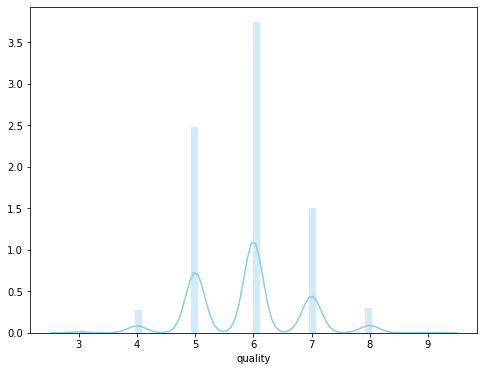

In [26]:
import seaborn as sns

f0 = plt.figure(figsize=(8, 6))
plt.set_title = 'White Wine Quality Distribution Plot'
sns.distplot(data_white['quality'], color = 'skyblue')
plt.show()

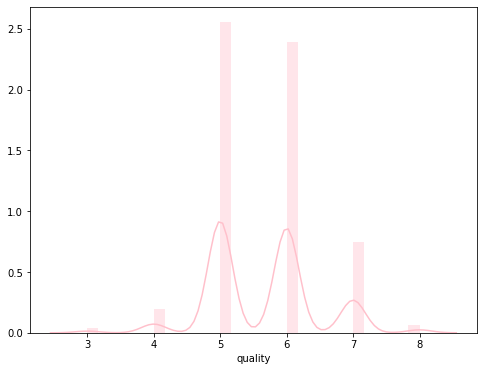

In [27]:
f0 = plt.figure(figsize=(8, 6))
ax.set_title = 'Red Wine Quality Distribution Plot'
sns.distplot(data_red['quality'], color = 'pink')
plt.show()

> Calculate optimal k

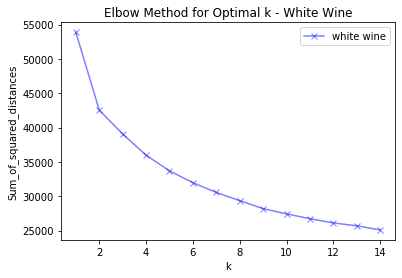

,num_clusters,sum_of_squared_dist.
0,1,53878.000000
1,2,42548.705849
2,3,39063.511115
3,4,35986.871142
4,5,33699.044450
5,6,31976.964165
6,7,30554.359947
7,8,29361.539663
8,9,28199.235840
9,10,27442.777725


In [8]:
W_sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k)
    km_white = km.fit(scaled_white)
    W_sum_of_squared_distances.append(km_white.inertia_)

plt.plot(K, W_sum_of_squared_distances, 'bx-', label='white wine', alpha=0.5)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k - White Wine')
plt.legend(loc = 'best')
plt.show()

clusters_white_df = pd.DataFrame({'num_clusters':K,
                                 'sum_of_squared_dist.':W_sum_of_squared_distances})
clusters_white_df[0:15]

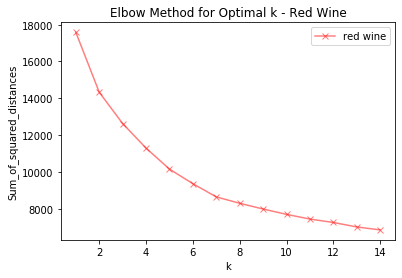

,num_clusters,sum_of_squared_dist.
0,1,17589.000000
1,2,14330.142460
2,3,12629.974592
3,4,11294.862137
4,5,10156.040420
5,6,9361.961753
6,7,8645.556554
7,8,8299.600308
8,9,7987.205428
9,10,7697.362956


In [10]:
R_sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k)
    km_red = km.fit(scaled_red)   
    R_sum_of_squared_distances.append(km_red.inertia_)

plt.plot(K, R_sum_of_squared_distances, 'rx-', label='red wine', alpha=0.5)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k - Red Wine')
plt.legend(loc = 'best')
plt.show()

clusters_red_df = pd.DataFrame({'num_clusters':K,
                                 'sum_of_squared_dist.':R_sum_of_squared_distances})
clusters_red_df

### PCA

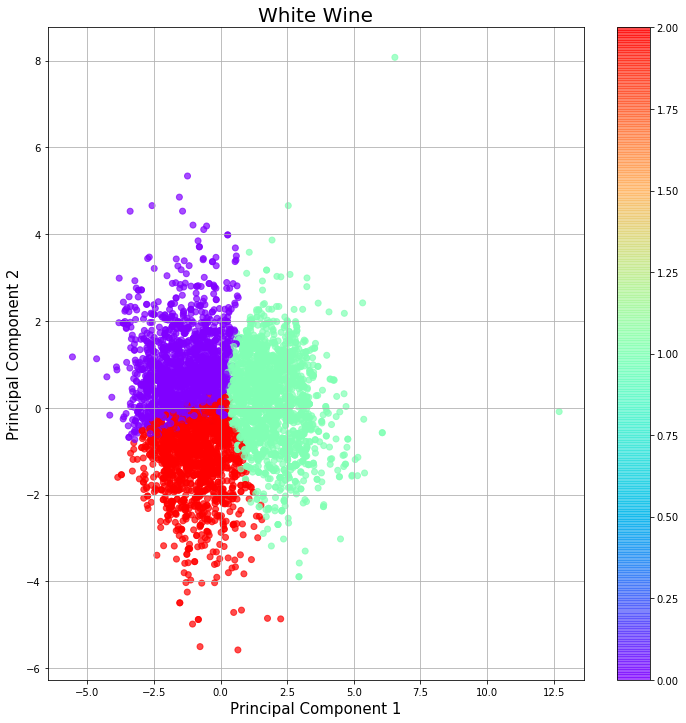

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans_white = kmeans.fit(scaled_white)
W_labels = kmeans_white.labels_

from sklearn.decomposition import PCA

pca_white = PCA(n_components=2)
principalComponents = pca_white.fit_transform(scaled_white)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('White Wine', fontsize=20)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)

ss = ax.scatter(principalDf['principal component 1'],
               principalDf['principal component 2'],
               alpha=0.7, c=W_labels, cmap='rainbow')
plt.colorbar(ss)
ax.grid()

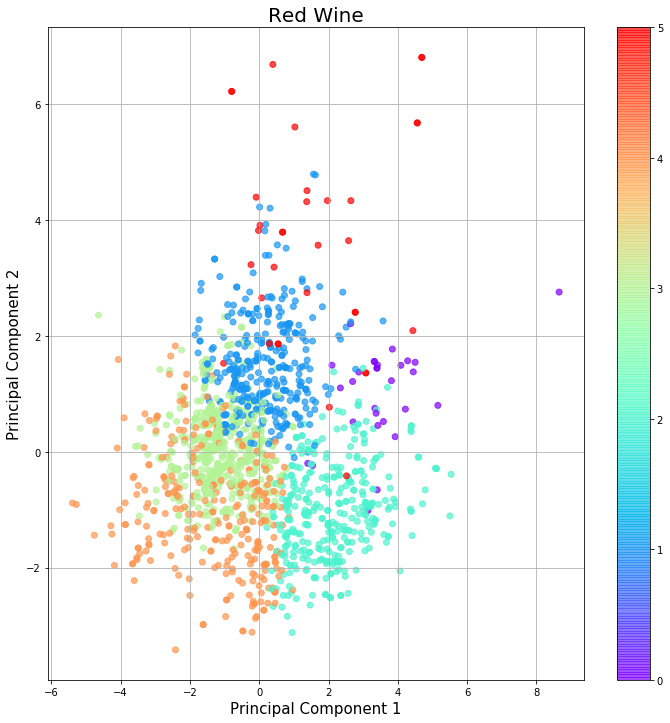

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans_red = kmeans.fit(scaled_red)
R_labels = kmeans_red.labels_

from sklearn.decomposition import PCA

pca_red = PCA(n_components=2)
principalComponents = pca_red.fit_transform(scaled_red)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Red Wine', fontsize=20)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)

ss = ax.scatter(principalDf['principal component 1'],
               principalDf['principal component 2'],
               alpha=0.7, c=R_labels, cmap='rainbow')
plt.colorbar(ss)
ax.grid()

### t-SNE

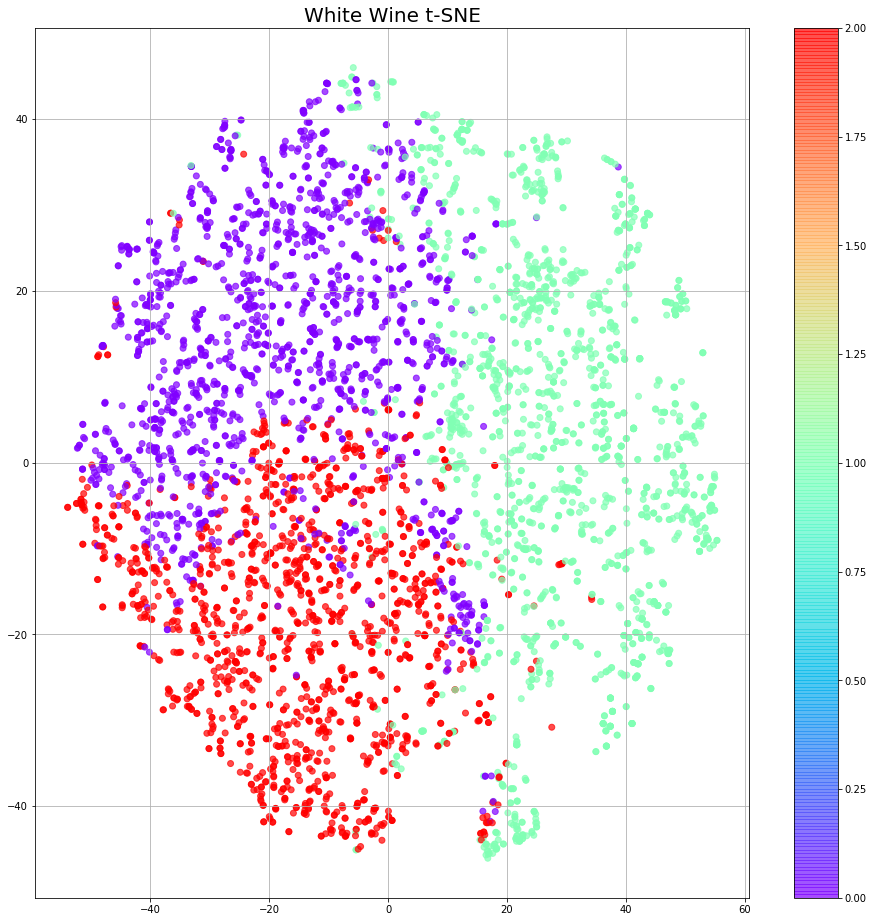

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)
low_dim_embs_W = tsne.fit_transform(scaled_white)

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('White Wine t-SNE', fontsize=20)

ss = ax.scatter(low_dim_embs_W[:,0], low_dim_embs_W[:,1],
               alpha = 0.7, c=W_labels, cmap='rainbow')
plt.colorbar(ss)
ax.grid()

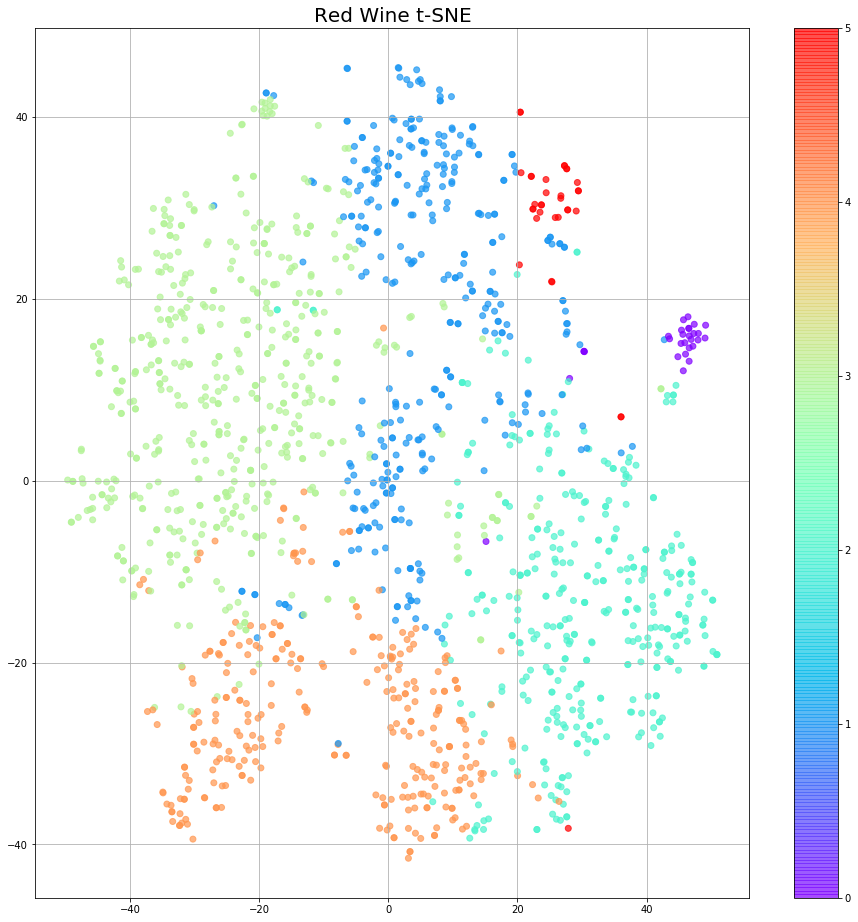

In [22]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)
low_dim_embs_R = tsne.fit_transform(scaled_red)

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Red Wine t-SNE', fontsize=20)

ss = ax.scatter(low_dim_embs_R[:,0], low_dim_embs_R[:,1],
               alpha = 0.7, c=R_labels, cmap='rainbow')
plt.colorbar(ss)
ax.grid()